# **DATA PREPARATION**

---



**Student Id: 20023693**

**Student Name: RIYA JOE**

Given Test Data "bank.csv" to perform the operations listed below:
- encoded all categorical attributes as numerical,
- filled in all missing values
- applied a scaler to rescale features
- treated outliers appropriately
- created at least one new feature from the existing ones.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df=pd.read_csv('bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [39]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [40]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


#**NULL VALUES**

In [41]:
print("THE COUNT OF NULL VALUES")
print(".........................")
df.isna().sum()

THE COUNT OF NULL VALUES
.........................


age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

**CONCLUSION**

---


It is observed that poutcome, contact and education,age,job has null data present 

**COPY THE DATAFRAME**

---



In [42]:
df_original = df

# **PROCESS AND ENCODE THE CATEGORICAL FEATURES**

---



**ORDINAL DATA** -The month field in bank data is mapped using a scale_mapper 

In [43]:
scale_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun":6,
    "jul":7,
    "aug":8,
    "sep":9,
    "oct":10,
    "nov":11,
    "dec":12
}

df['month'] = df['month'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


# **ONE-HOT ENCODE ALL OTHER CATEGORICAL ATTRIBUTES**

1. From the information gathered we infer that education,contact,poutcome has large number of missing/NAN values.
2. Perform Hot encoding to convert categorical values into numerical values 




In [44]:
df = pd.get_dummies(df, columns=['job','education','contact', 'poutcome'], 
                        dummy_na=True)
df.tail()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,education_secondary,education_tertiary,education_nan,contact_cellular,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,no,2785,no,no,16,9,327,2,...,0,0,1,1,0,0,0,0,0,1
1996,28.0,single,no,127,no,no,16,9,1334,2,...,1,0,0,1,0,0,0,0,0,1
1997,81.0,married,no,1154,no,no,17,9,231,1,...,0,0,0,0,1,0,0,0,0,1
1998,46.0,married,no,4343,yes,no,20,9,185,1,...,0,0,0,0,0,1,0,0,0,1
1999,40.0,married,no,6403,no,no,22,9,208,2,...,1,0,0,1,0,0,0,0,0,1


In [45]:
df = pd.get_dummies(df,dummy_na=True)
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,default_nan,housing_no,housing_yes,housing_nan,loan_no,loan_yes,loan_nan,subscribed_no,subscribed_yes,subscribed_nan
1995,20.0,2785,16,9,327,2,-1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1996,28.0,127,16,9,1334,2,-1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1997,81.0,1154,17,9,231,1,-1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1998,46.0,4343,20,9,185,1,-1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1999,40.0,6403,22,9,208,2,-1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


Dropping third element columns containing NaN values  

In [46]:
df=df.drop(columns=['job_nan','education_nan','contact_nan','poutcome_nan','loan_nan','default_nan','housing_nan','subscribed_nan'])
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,marital_single,marital_nan,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,subscribed_no,subscribed_yes
1995,20.0,2785,16,9,327,2,-1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1996,28.0,127,16,9,1334,2,-1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
1997,81.0,1154,17,9,231,1,-1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1998,46.0,4343,20,9,185,1,-1,0,0,0,...,0,0,1,0,0,1,1,0,0,1
1999,40.0,6403,22,9,208,2,-1,0,0,0,...,0,0,1,0,1,0,1,0,0,1


**CHECK THE LATEST COUNT OF NULL VALUES IN COLUMN ATTRIBUTES**

In [47]:
print("THE COUNT OF NULL VALUES")
print("..........................")
df.isna().sum()

THE COUNT OF NULL VALUES
..........................


age                    12
balance                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
job_admin.              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
education_primary       0
education_secondary     0
education_tertiary      0
contact_cellular        0
contact_telephone       0
poutcome_failure        0
poutcome_other          0
poutcome_success        0
marital_divorced        0
marital_married         0
marital_single          0
marital_nan             0
default_no              0
default_yes             0
housing_no              0
housing_yes             0
loan_no                 0
loan_yes                0
subscribed_no           0
subscribed_y

In [56]:
df['job_management'].value_counts()

0    1539
1     461
Name: job_management, dtype: int64

In [57]:
ptable = df.pivot_table(values='age', 
                        index='job_management',
                        columns='subscribed_yes',  
                        aggfunc=np.median)
ptable

subscribed_yes,0,1
job_management,,
0,39.0,39.0
1,38.0,37.0


Age has 12 missing values ,which is less than 25 % of the values so we can impute values based on most common job and their subscription 

In [58]:
def get_element(x):
    return ptable.loc[x['job_management'], x['subscribed_yes']]

df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [59]:
print("THE COUNT OF NULL VALUES")
print("..........................")
df.isna().sum()

THE COUNT OF NULL VALUES
..........................


age                    0
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
education_primary      0
education_secondary    0
education_tertiary     0
contact_cellular       0
contact_telephone      0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
marital_divorced       0
marital_married        0
marital_single         0
marital_nan            0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
subscribed_no          0
subscribed_yes         0
dtype: int64

#**SCALING AND TREATMENT OF OUTLIERS**

Possible Outliers Identified :
 
1.  AGE 
1.  BALANCE
2.  DURATION




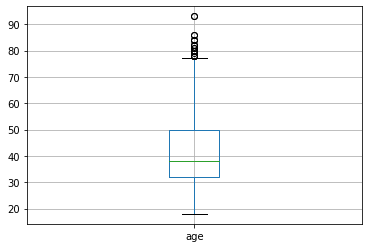

In [60]:
df.boxplot(column=['age'])
plt.show()

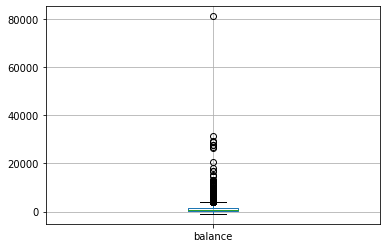

In [61]:
df.boxplot(column=['balance'])
plt.show()

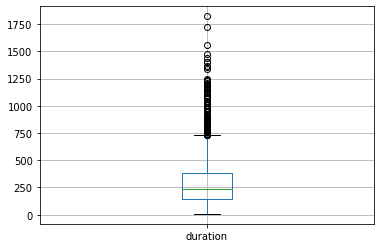

In [62]:
df.boxplot(column=['duration'])
plt.show()

Hence we treat the outliers by scaling them using robust scaler and applying log function to it .

In [63]:
robust_scaler = RobustScaler()
df[['age']] = robust_scaler.fit_transform(df[['age']])

In [64]:
robust_scaler = RobustScaler()
df[['balance']] = robust_scaler.fit_transform(df[['balance']])


In [65]:
robust_scaler = RobustScaler()
df[['duration']] = robust_scaler.fit_transform(df[['duration']])


In [66]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,marital_single,marital_nan,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,subscribed_no,subscribed_yes
0,-0.333333,-0.110187,1,4,3.094421,2,131,2,0,0,...,1,0,1,0,0,1,1,0,1,0
1,0.055556,0.094941,1,4,-0.012876,2,133,1,0,0,...,0,0,1,0,0,1,0,1,1,0
2,1.166667,0.335412,1,4,-0.472103,2,239,1,0,0,...,0,0,1,0,0,1,0,1,1,0
3,0.500000,-0.106029,1,4,0.163090,1,238,2,0,1,...,0,0,1,0,0,1,0,1,1,0
4,0.888889,0.313929,1,4,1.042918,1,307,1,0,0,...,0,0,1,0,0,1,1,0,1,0


<AxesSubplot:title={'center':'VARIATION IN RESCALED DURATION'}, xlabel='DURATION', ylabel='NUMBER OF ACCOUNTS'>

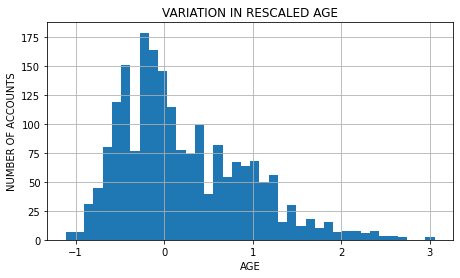

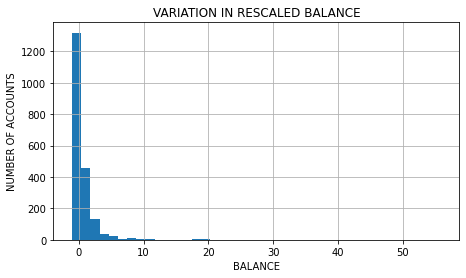

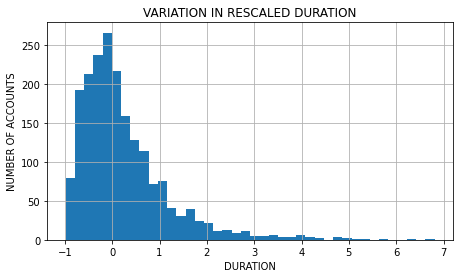

In [67]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("VARIATION IN RESCALED AGE")
ax1.set_xlabel('AGE')
ax1.set_ylabel('NUMBER OF ACCOUNTS')
df['age'].hist(bins=40)
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("VARIATION IN RESCALED BALANCE")
ax1.set_xlabel('BALANCE')
ax1.set_ylabel('NUMBER OF ACCOUNTS')
df['balance'].hist(bins=40)
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("VARIATION IN RESCALED DURATION")
ax1.set_xlabel('DURATION')
ax1.set_ylabel('NUMBER OF ACCOUNTS')
df['duration'].hist(bins=40)

In [68]:
df[['balance', 'duration','age']].min()

balance    -1.060984
duration   -0.982833
age        -1.111111
dtype: float64

In [69]:
df['age']= np.log(df['age']+2.2)
df['balance'] = np.log(df['balance']+2.07)
df['duration'] =np.log(df['duration']+1.99)
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,marital_single,marital_nan,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,subscribed_no,subscribed_yes
0,0.624154,0.672849,1,4,1.626181,2,131,2,0,0,...,1,0,1,0,0,1,1,0,1,0
1,0.813396,0.772393,1,4,0.681643,2,133,1,0,0,...,0,0,1,0,0,1,0,1,1,0
2,1.213923,0.877721,1,4,0.417326,2,239,1,0,0,...,0,0,1,0,0,1,0,1,1,0
3,0.993252,0.674968,1,4,0.766904,1,238,2,0,1,...,0,0,1,0,0,1,0,1,1,0
4,1.127811,0.868750,1,4,1.109525,1,307,1,0,0,...,0,0,1,0,0,1,1,0,1,0


<AxesSubplot:title={'center':'VARIATION IN RESCALED DURATION'}, xlabel='DURATION', ylabel='NUMBER OF ACCOUNTS'>

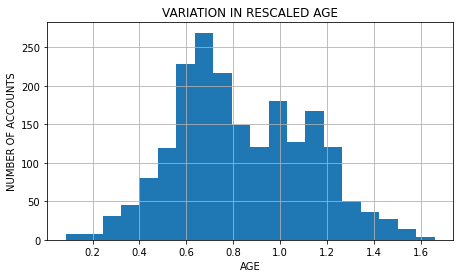

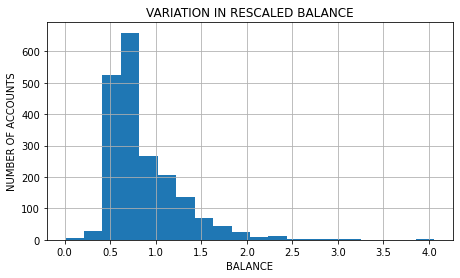

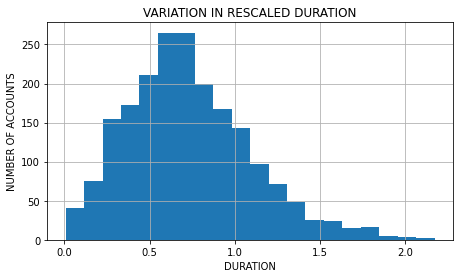

In [24]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("VARIATION IN RESCALED AGE")
ax1.set_xlabel('AGE')
ax1.set_ylabel('NUMBER OF ACCOUNTS')
df['age'].hist(bins=20)

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("VARIATION IN RESCALED BALANCE")
ax1.set_xlabel('BALANCE')
ax1.set_ylabel('NUMBER OF ACCOUNTS')
df['balance'].hist(bins=20)

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("VARIATION IN RESCALED DURATION")
ax1.set_xlabel('DURATION')
ax1.set_ylabel('NUMBER OF ACCOUNTS')
df['duration'].hist(bins=20)

# **DERIVED ATTRIBUTES**

**1. DERIVED ATTRIBUTE FOR TIME**

---


A combination of Day and Month  as **Time** for last contact. Year is ambiguous 

In [25]:
df['time']=df['month'].astype(str)+'-'+df['day'].astype(str)

In [26]:
print("TIME IN FORMAT MONTH-DAY")
df['time'].head()

TIME IN FORMAT MONTH-DAY


0    4-1
1    4-1
2    4-1
3    4-1
4    4-1
Name: time, dtype: object

**2. DERIVED ATTRIBUTE FOR CREDIT**

---



<AxesSubplot:title={'center':'THE DISTRIBUTION FOR NUMBER OF ACCOUNTS WITH LOAN'}, xlabel='LOAN_YES', ylabel='NUMBER OF ACCOUNT HOLDERS'>

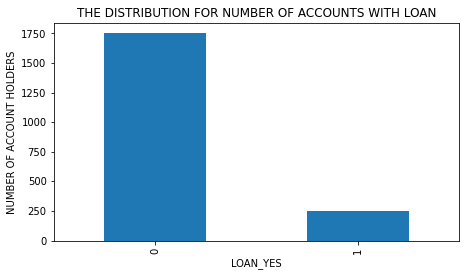

In [27]:
# Create figure using Loan 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("THE DISTRIBUTION FOR NUMBER OF ACCOUNTS WITH LOAN")
ax1.set_xlabel('LOAN_YES')
ax1.set_ylabel('NUMBER OF ACCOUNT HOLDERS')
df['loan_yes'].value_counts().plot.bar()

<AxesSubplot:title={'center':'THE DISTRIBUTION FOR NUMBER OF ACCOUNTS WITH HOUSING LOAN'}, xlabel='HOUSING_YES', ylabel='NUMBER OF ACCOUNT HOLDERS'>

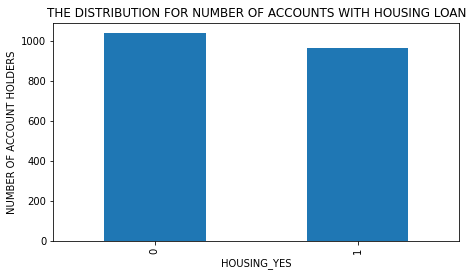

In [28]:
#Create figure using Housing
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("THE DISTRIBUTION FOR NUMBER OF ACCOUNTS WITH HOUSING LOAN")
ax1.set_xlabel('HOUSING_YES')
ax1.set_ylabel('NUMBER OF ACCOUNT HOLDERS')
df['housing_yes'].value_counts().plot.bar()

<AxesSubplot:title={'center':'THE DISTRIBUTION FOR NUMBER OF ACCOUNTS WITH DEFAULT_CREDIT'}, xlabel='DEFAULT_YES', ylabel='NUMBER OF ACCOUNT HOLDERS'>

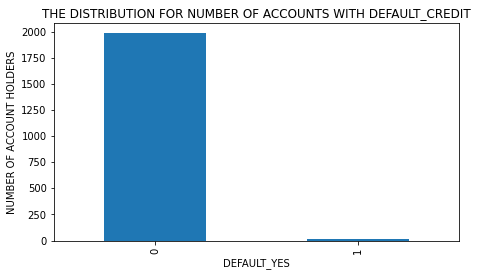

In [30]:
#Create figure using Default
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("THE DISTRIBUTION FOR NUMBER OF ACCOUNTS WITH DEFAULT_CREDIT")
ax1.set_xlabel('DEFAULT_YES')
ax1.set_ylabel('NUMBER OF ACCOUNT HOLDERS')
df['default_yes'].value_counts().plot.bar()

In [34]:
df['credits']=df['housing_yes']|df['loan_yes']|df['default_yes']

<AxesSubplot:title={'center':'THE DISTRIBUTION FOR NUMBER OF ACCOUNTS WITH CREDITS'}, xlabel='CREDITS APPLIED', ylabel='NUMBER OF ACCOUNT HOLDERS'>

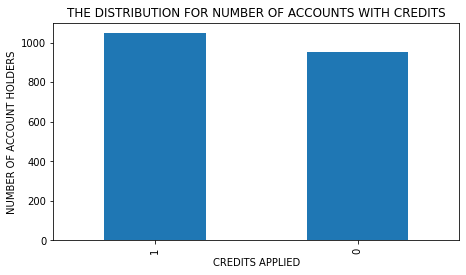

In [35]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("THE DISTRIBUTION FOR NUMBER OF ACCOUNTS WITH CREDITS")
ax1.set_xlabel('CREDITS APPLIED')
ax1.set_ylabel('NUMBER OF ACCOUNT HOLDERS')
df['credits'].value_counts().plot.bar()

# COPY TO DISK

In [ ]:
df.to_csv('bank_updated.csv')